In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

linear Regression

In [54]:
mydata=pd.read_csv('/content/Life Expectancy Data.csv')

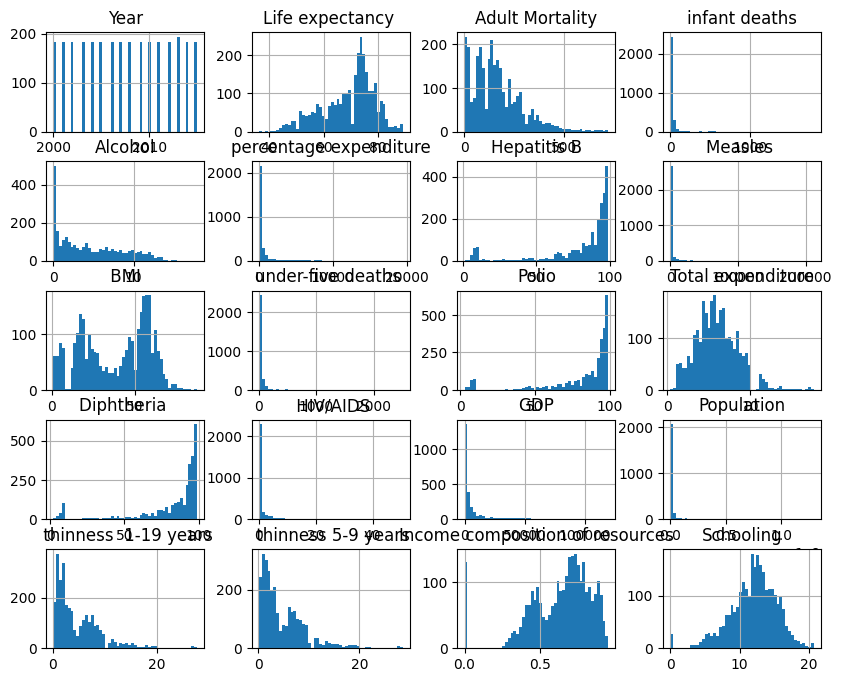

In [55]:
mydata.hist(bins=50, figsize=(10,8))
plt.show()

<Axes: xlabel='Adult Mortality', ylabel='Life expectancy '>

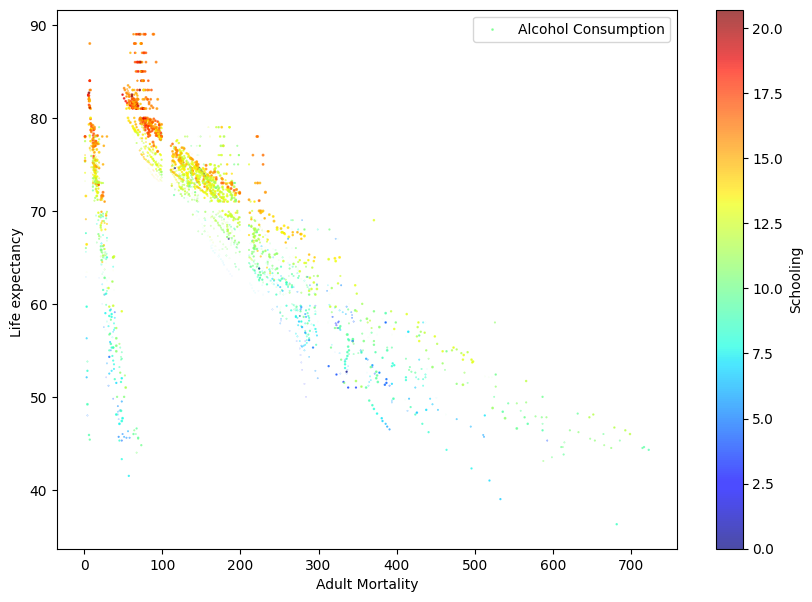

In [56]:
mydata.plot(kind="scatter",
                         x="Adult Mortality",  # Replace with a relevant column
                         y="Life expectancy ", # Replace with a relevant column
                         c="Schooling",        # Replace with a column for color-coding
                         cmap="jet",
                         colorbar=True,
                         legend=True,
                         sharex=False,
                         figsize=(10, 7),
                         s=mydata['Alcohol']/10,  # Replace with a relevant column for size and adjust scaling
                         label="Alcohol Consumption", # Replace with a label for size
                         alpha=0.7)

In [57]:
mydata.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [58]:
mydata.dtypes

,0
Country,object
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64


In [59]:
x = mydata[["Adult Mortality"]]
y = mydata['Life expectancy ']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
lr = LinearRegression()

In [62]:
# Drop rows with missing values in 'Adult Mortality'
x_train = x_train.dropna()
y_train = y_train[x_train.index]  # Update y_train to match x_train's index

# Now you can fit the model
lr.fit(x_train.values, y_train)

LinearRegression()

In [63]:
# Drop rows with missing values in 'Adult Mortality'
x_test = x_test.dropna()
y_test = y_test[x_test.index]  # Update y_test to match x_test index
# predict y
y_pred = lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [64]:
r2_score(y_test,y_pred)


0.4465987393597506

In [65]:
print(lr.intercept_)

78.1809592152868


In [66]:
lr.predict(x[0:1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([64.05936635])

In [67]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [68]:
import pickle

In [69]:
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [70]:
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [71]:
x[0:5]

,Adult Mortality
0,263.0
1,271.0
2,268.0
3,272.0
4,275.0


In [72]:
clf2.predict(x[0:5])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([64.05936635, 63.6298122 , 63.790895  , 63.57611793, 63.41503512])

In [73]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

      Actual  Predicted
2546    73.7  71.576564
650     75.9  72.113507
1740    74.2  71.469176
177     76.8  77.805099
1377    51.9  55.199812


Multiple Regression


In [74]:
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

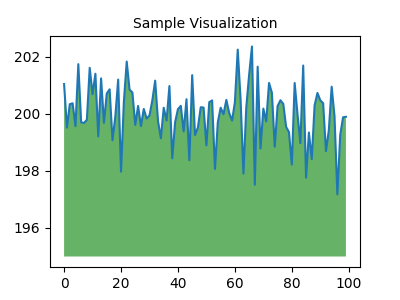

In [75]:
ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder for categorical encoding
from sklearn.compose import ColumnTransformer # Import ColumnTransformer
from sklearn.preprocessing import StandardScaler #For feature scaling

In [77]:
print("Missing Values:")
print(mydata.isnull().sum())

Missing Values:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [78]:
def remove_outliers_iqr(df, columns):
    """
    Removes outliers from specified columns of a DataFrame using the IQR method.

    Args:
        df (pd.DataFrame): The DataFrame to process.
        columns (list): List of columns to remove outliers from.

    Returns:
        pd.DataFrame: The DataFrame with outliers removed.
    """

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [79]:
x = mydata.drop(['Life expectancy '], axis=1)  # Add a space after 'expectancy'
y = mydata['Life expectancy ']

In [80]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2938, 21)
Shape of y: (2938,)


In [81]:
x = x.values
y = y.values

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [83]:
print("Shape of x:", x_train.shape)
print("Shape of y:", y_train.shape)

Shape of x: (2350, 21)
Shape of y: (2350,)


In [84]:
from sklearn.impute import SimpleImputer

In [91]:
# Assuming 'mydata' is your DataFrame

# 1. Filling with mean for numerical features:
numerical_cols = mydata.select_dtypes(include=np.number).columns.tolist()
numerical_imputer = SimpleImputer(strategy='mean')
mydata[numerical_cols] = numerical_imputer.fit_transform(mydata[numerical_cols])

# 2. Filling with most frequent value for categorical features:
categorical_cols = mydata.select_dtypes(include=['object']).columns.tolist()
categorical_imputer = SimpleImputer(strategy='most_frequent')
mydata[categorical_cols] = categorical_imputer.fit_transform(mydata[categorical_cols])

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [93]:
mydata.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,...,False,False,False,False,False,False,False,False,False,False
1,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,...,False,False,False,False,False,False,False,False,False,False
2,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,...,False,False,False,False,False,False,False,False,False,False
3,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,...,False,False,False,False,False,False,False,False,False,False
4,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,...,False,False,False,False,False,False,False,False,False,False


In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# ... (your previous code) ...

# Separate features (x) and target (y)
x = mydata.drop(columns=['Life expectancy '])  # Assuming 'Life expectancy ' is your target variable
y = mydata['Life expectancy ']

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for numpy array

# Fit the encoder to the 'Country' column and transform it
encoded_data = encoder.fit_transform(x[['Status']])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Status']))

# Drop the original 'Country' column and concatenate the encoded DataFrame
x = x.drop(columns=['Status']).reset_index(drop=True)
x = pd.concat([x, encoded_df], axis=1)


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# =======================================
# Multiple Linear Regression
# =======================================
model_multiple = LinearRegression()

# Train the model
model_multiple.fit(x_train, y_train)

# Make predictions on the test set
y_pred_multiple = model_multiple.predict(x_test)

# Evaluate the model
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")



Multiple Linear Regression
  Mean Squared Error: 3.4358
  R² Score: 0.9603


In [95]:
print(model_multiple.intercept_)

-465.5199662434993


In [96]:

# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multiple})
print(predictions.head())

      Actual  Predicted
2546    73.7  70.414631
650     75.9  75.782469
1740    74.2  74.665038
177     76.8  77.426421
1377    51.9  51.449550
